Q2. A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.


Objectives:
Automate Animal Classification: Develop a KNN-based model to classify animals based on specific attributes. This classification should help in organizing animals within the zoo according to their characteristics.

Enhance Zoo Management: Facilitate easier animal management by categorizing animals, which can help with enclosure arrangements, feeding schedules, and medical care.

Improve Visitor Experience: By grouping similar animals together, the zoo can create a more organized layout that enhances the educational and viewing experience for visitors.

Support Conservation Efforts: Grouping animals with similar ecological or biological attributes may aid in conservation planning, breeding programs, and habitat simulations.


Constraints:

Data Quality: The model's performance relies on accurate, consistent, and comprehensive data on animal attributes. Any data inaccuracies could affect classification results.

Model Sensitivity: KNN models can be sensitive to the choice of the k value, so it may require tuning to achieve optimal classification accuracy.

Scalability: The model should be able to handle an expanding database of animal attributes, especially if new animals or updated attributes are added.

Interpretability: The classification results should be easily interpretable by zoo staff to facilitate effective decision-making.

Computational Efficiency: Since KNN is a lazy learning algorithm, the model can be computationally expensive, especially with larger datasets. Efficient computation is necessary if the model is expected to be used in real-time.

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
##First we will check shape of data
data.shape

(101, 18)

In [4]:
#data Dictionary
"""
animal.name :Discrete (Categorical)
hair	    :Discrete (Binary)
feathers	:Discrete (Binary)
eggs	    :Discrete (Binary)
milk	    :Discrete (Binary)
airborne	:Discrete (Binary)
aquatic	    :Discrete (Binary)
predator	:Discrete (Binary)
toothed	    :Discrete (Binary)
backbone	:Discrete (Binary)
breathes	:Discrete (Binary)
venomous	:Discrete (Binary)
fins	    :Discrete (Binary)
legs	    :Discrete (Integer)
tail	    :Discrete (Binary)
domestic	:Discrete (Binary)
"""


'\nanimal.name :Discrete (Categorical)\nhair\t    :Discrete (Binary)\nfeathers\t:Discrete (Binary)\neggs\t    :Discrete (Binary)\nmilk\t    :Discrete (Binary)\nairborne\t:Discrete (Binary)\naquatic\t    :Discrete (Binary)\npredator\t:Discrete (Binary)\ntoothed\t    :Discrete (Binary)\nbackbone\t:Discrete (Binary)\nbreathes\t:Discrete (Binary)\nvenomous\t:Discrete (Binary)\nfins\t    :Discrete (Binary)\nlegs\t    :Discrete (Integer)\ntail\t    :Discrete (Binary)\ndomestic\t:Discrete (Binary)\n'

In [5]:
#Data Preprocessing 
#First we will check the data type
data.dtypes 
#Here we can observe alll the values are of int64 type

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
#Check the null values
data.isna().sum() 
#from ouput we can see that there are zero null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

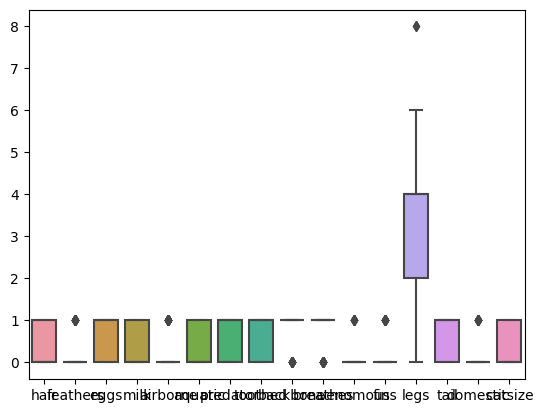

In [7]:
#checking the outliers
import seaborn as sns
sns.boxplot(data[["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize"]])

(<Axes: >, (101, 17))

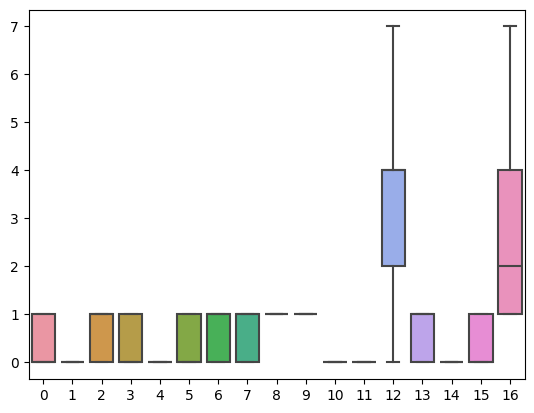

In [13]:
#Now outlier Treatment using replacement technique
data=data.iloc[:,1:]
IQR=data.quantile(0.75)-data.quantile(0.25)
IQR
lower_limit=data.quantile(0.25)-1.5*IQR
upper_limit=data.quantile(0.75)+1.5*IQR
IQR,lower_limit,upper_limit

df_replaced=pd.DataFrame(np.where(data>upper_limit,upper_limit,np.where(data<lower_limit,lower_limit,data)))
sns.boxplot(df_replaced),df_replaced.shape
#now from boxplot we can see that outliers has been removed

EDA
-

In [15]:
df_replaced.describe() #by this we came to know min ,max,std,mean 25%,75%,50%

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,101.000000,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.0,101.0,101.0,101.0,101.000000,101.000000,101.0,101.000000,101.000000
mean,0.425743,0.0,0.584158,0.405941,0.0,0.356436,0.554455,0.603960,1.0,1.0,0.0,0.0,2.821782,0.742574,0.0,0.435644,2.831683
std,0.496921,0.0,0.495325,0.493522,0.0,0.481335,0.499505,0.491512,0.0,0.0,0.0,0.0,1.986938,0.439397,0.0,0.498314,2.102709
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,2.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,0.000000,2.000000
75%,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,4.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,7.000000,1.000000,0.0,1.000000,7.000000


In [16]:
#Model Building
#NOw let us apply x as input and y as output

X=np.array(df_replaced.iloc[:,1:17])
y=np.array(data['type'])

In [17]:
#NOw we will split the data into training and testing state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
#Now we will apply model
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
pred

array([1, 2, 2, 1, 7, 1, 1, 7, 1, 1, 1, 6, 4, 1, 1, 2, 4, 5, 7, 1, 2],
      dtype=int64)

In [19]:
# Now we will wvaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test)) 
pd.crosstab(pred,y_test)

1.0


col_0,1,2,4,5,6,7
row_0,,,,,,
1,10,0,0,0,0,0
2,0,4,0,0,0,0
4,0,0,2,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,0,0,3


In [85]:
#let us try to select correct value of k
acc=[]
#Running KNN algorithm for k=3 to 50 in steps of 2
for i in range(3,50,2):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_test)
    train_acc=np.mean(neigh.predict(X_train)==y_train)
    test_acc=np.mean(neigh.predict(X_test)==y_test)
    acc.append([train_acc,test_acc])

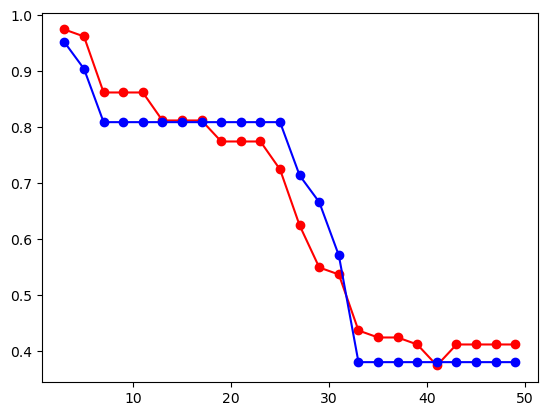

In [87]:
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")